In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest 

In [2]:
file_path=r"C:\Users\Debasish Das\Desktop\Flight_Price_Prediction\Dataset\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-06-03,Delhi,Cochin,08:30:00,19:00:00,630,1.0,No Info,11200
1,Spicejet,2019-05-24,Kolkata,Banglore,11:35:00,18:50:00,435,1.0,No Info,8479
2,Jet Airways,2019-06-27,Delhi,Cochin,13:25:00,19:00:00,1775,2.0,In-flight meal not included,11150
3,Air India,2019-06-12,Kolkata,Banglore,10:00:00,13:45:00,1665,2.0,No Info,12224
4,Indigo,2019-06-24,Delhi,Cochin,16:10:00,22:30:00,380,1.0,No Info,6412
...,...,...,...,...,...,...,...,...,...,...
6395,Vistara,2019-05-15,Kolkata,Banglore,17:00:00,23:25:00,385,1.0,No Info,9345
6396,Air India,2019-06-15,Chennai,Kolkata,11:40:00,13:55:00,135,0.0,No Info,4667
6397,Multiple Carriers,2019-06-27,Delhi,Cochin,14:00:00,21:00:00,420,1.0,No Info,13587
6398,Indigo,2019-06-21,Banglore,Delhi,13:00:00,15:50:00,170,0.0,No Info,3943


## 2. High Level Summery

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train=train.assign(
    **{
        col:pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
        for col in ["date_of_journey","dep_time","arrival_time"]
    }
)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6400 non-null   object        
 1   date_of_journey  6400 non-null   datetime64[ns]
 2   source           6400 non-null   object        
 3   destination      6400 non-null   object        
 4   dep_time         6400 non-null   datetime64[ns]
 5   arrival_time     6400 non-null   datetime64[ns]
 6   duration         6400 non-null   int64         
 7   total_stops      6399 non-null   float64       
 8   additional_info  6400 non-null   object        
 9   price            6400 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 500.1+ KB


In [5]:
train.describe(include="number")

,duration,total_stops,price
count,6400.000000,6399.000000,6400.000000
mean,634.128125,0.804188,9043.174375
std,500.288389,0.657708,4689.412629
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5228.000000
50%,515.000000,1.000000,8266.000000
75%,910.000000,1.000000,12342.250000
max,2860.000000,4.000000,79512.000000


In [6]:
train.describe(include="O")

,airline,source,destination,additional_info
count,6400,6400,6400,6400
unique,9,5,6,8
top,Jet Airways,Delhi,Cochin,No Info
freq,2245,2650,2650,5010


In [7]:
(
    train.assign(total_stops=train.total_stops.astype(object)
     
    ).describe(include="O")   
)

,airline,source,destination,total_stops,additional_info
count,6400,6400,6400,6399.0,6400
unique,9,5,6,5.0,8
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2245,2650,2650,3463.0,5010


## 4. High Level analysis Of Missing Values

In [8]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.015625


In [9]:
train=train.assign(
    total_stops=train.total_stops.fillna(0)
)
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [10]:
#[col for col in train.columns if train[col].isna().any()]

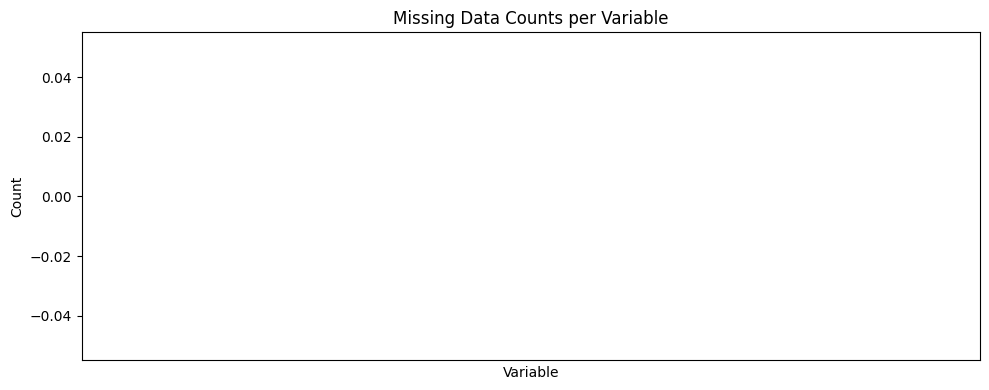

In [11]:
eda_helper_functions.plot_missing_info(train)

## 5. High Level of Outliers

In [12]:
forest=IsolationForest(n_estimators=6400,random_state=42)

In [13]:
 
(train.assign(outliers=IsolationForest(contamination=0.01).fit_predict(train.drop(columns="price").select_dtypes(include="number")))
     .query("outliers == -1")
     .duration
     .describe)

C:\Users\Debasish Das\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<bound method NDFrame.describe of 43      1910
113     1950
139     2245
168     2230
201     2240
        ... 
6102    1925
6157    2170
6235    2295
6301    2860
6373    2240
Name: duration, Length: 62, dtype: int64>

## 6. Pair plots

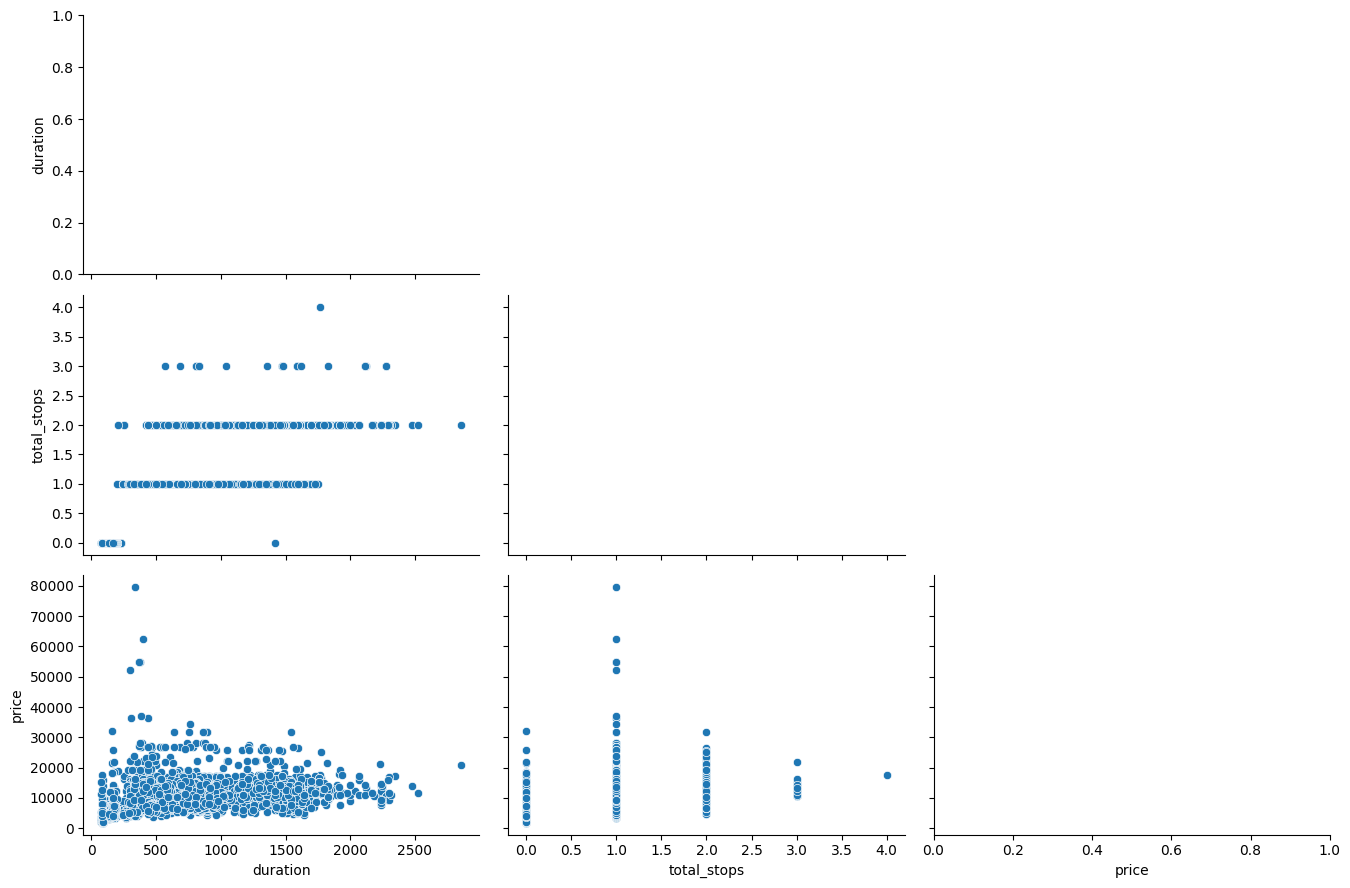

In [14]:
eda_helper_functions.pair_plots(train)

## 7. Correlation

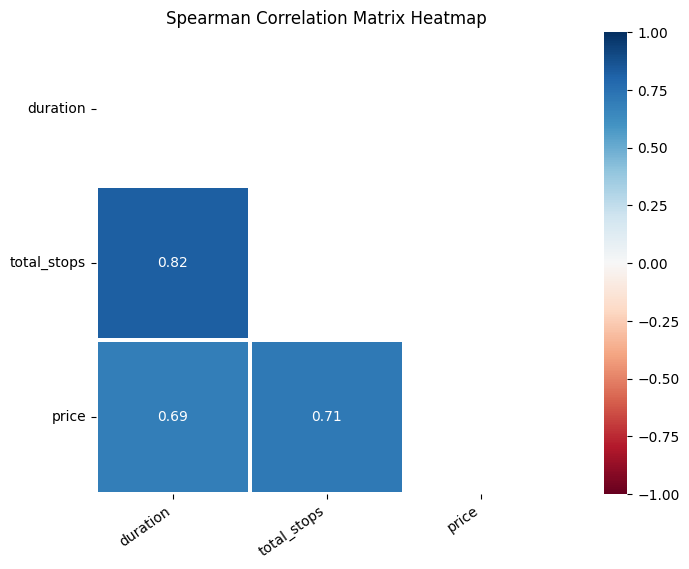

In [15]:
eda_helper_functions.correlation_heatmap(train)

In [16]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.822844,0.691926
total_stops,0.822844,1.000000,0.711429
price,0.691926,0.711429,1.000000


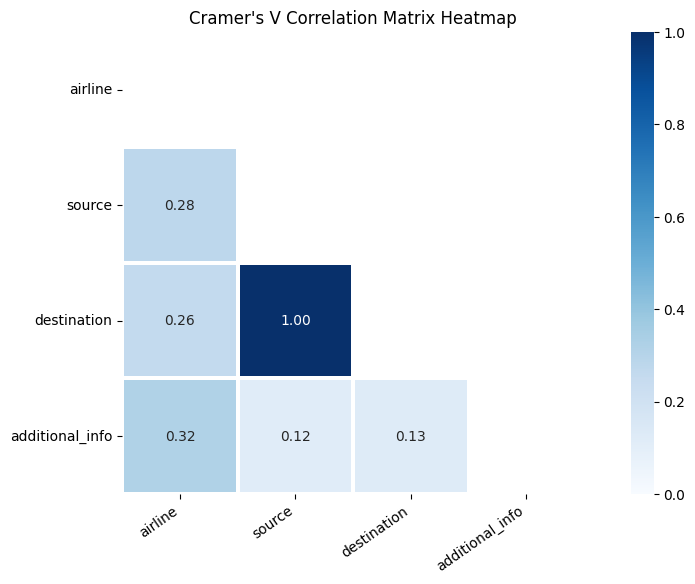

In [17]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed analysis of each feature 

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1. Airline

In [19]:
train.airline

0       Multiple Carriers
1                Spicejet
2             Jet Airways
3               Air India
4                  Indigo
              ...        
6395              Vistara
6396            Air India
6397    Multiple Carriers
6398               Indigo
6399            Air India
Name: airline, Length: 6400, dtype: object

In [20]:
eda_helper_functions.cat_summary(train,"airline")

0       Multiple Carriers
1                Spicejet
2             Jet Airways
3               Air India
4                  Indigo
              ...        
6395              Vistara
6396            Air India
6397    Multiple Carriers
6398               Indigo
6399            Air India
Name: airline, Length: 6400, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


,
count,6400
unique,9
top,Jet Airways
freq,2245


,count,percentage
category,,
Jet Airways,2245,0.350781
Indigo,1234,0.192812
Air India,1056,0.165000
Multiple Carriers,741,0.115781
Spicejet,515,0.080469
Vistara,294,0.045937
Air Asia,197,0.030781
Goair,117,0.018281
Trujet,1,0.000156


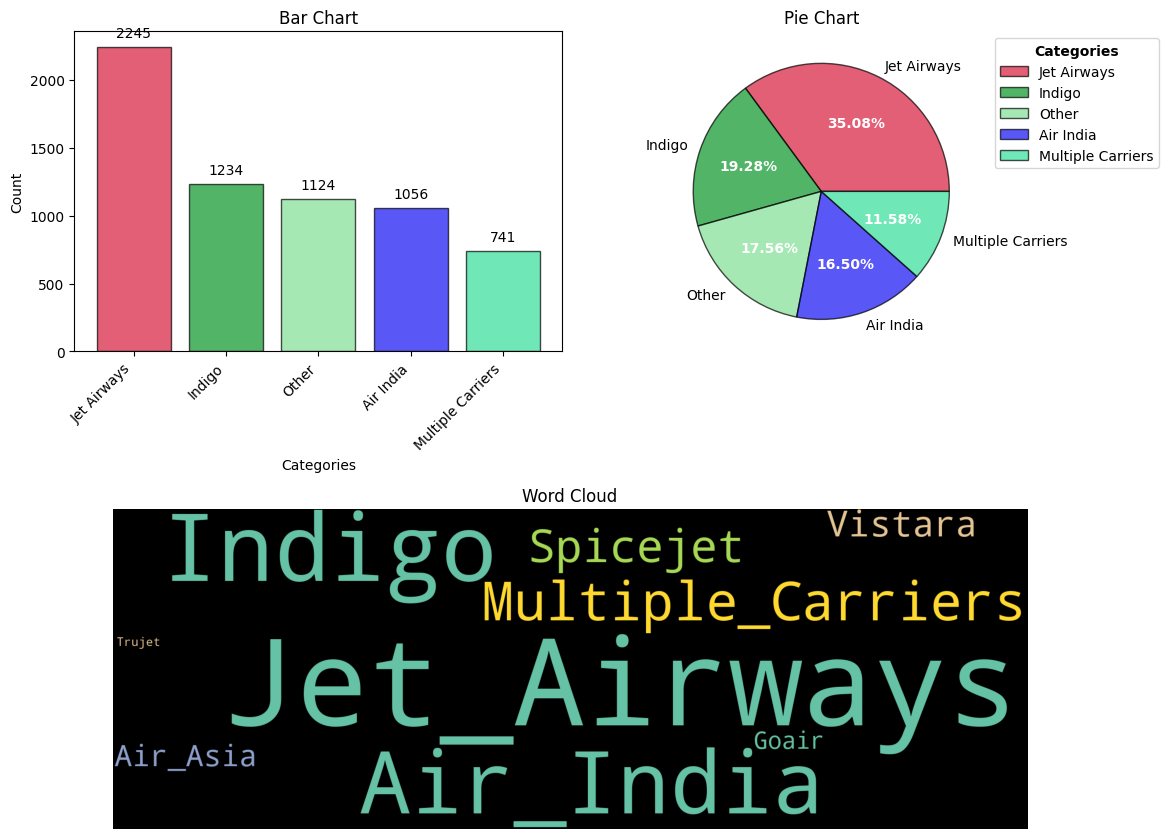

In [21]:
eda_helper_functions.cat_univar_plots(train,"airline",k=4)

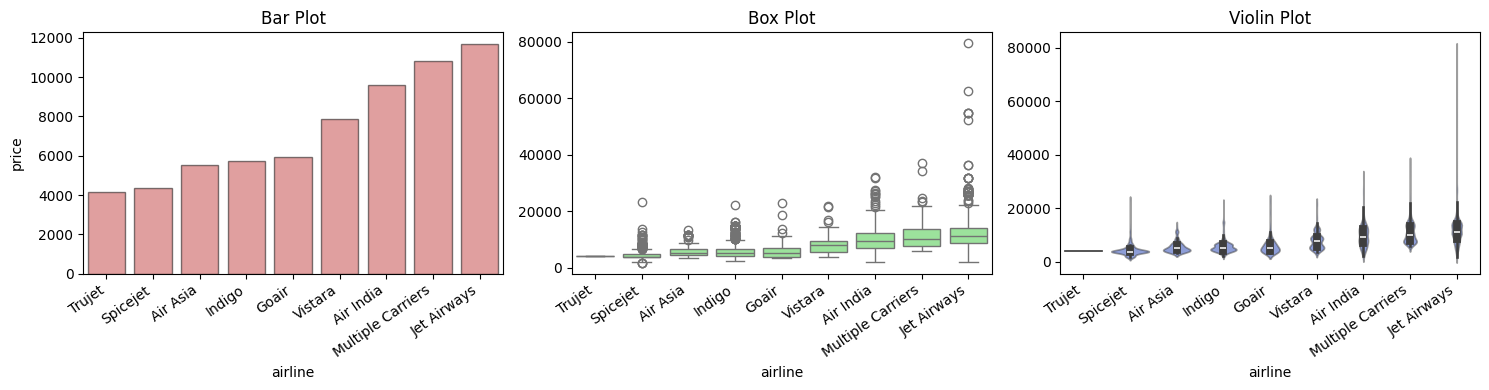

In [22]:
eda_helper_functions.num_cat_bivar_plots(data=train,num_var="price",cat_var="airline")

In [23]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 404.5954979743721
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2862.195242007473
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


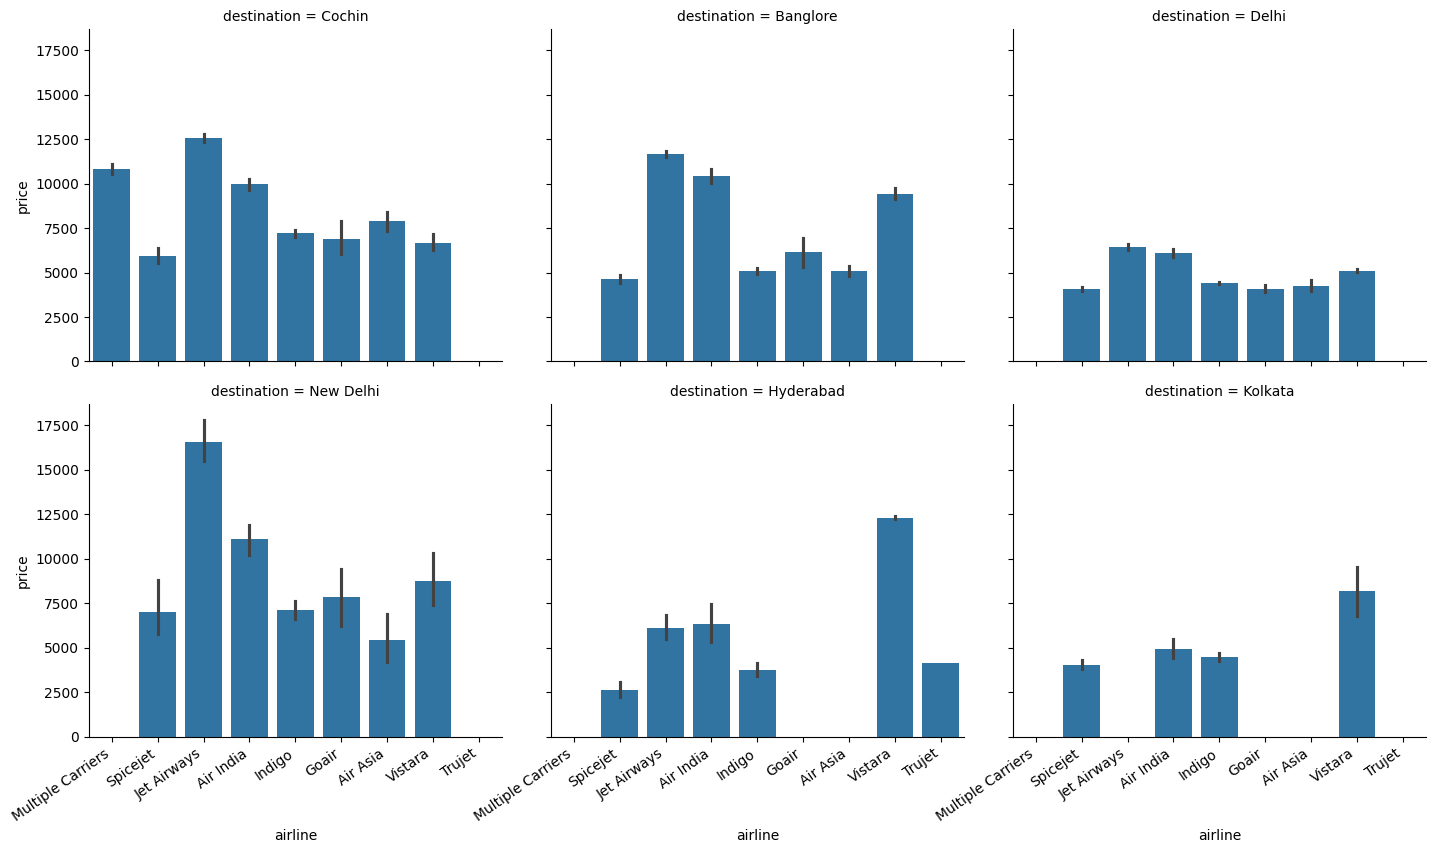

In [24]:
airline_grid=sns.FacetGrid(data=train,col="destination",col_wrap=3,height=4,aspect=1.2,sharey=True)
airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [25]:
train.airline

0       Multiple Carriers
1                Spicejet
2             Jet Airways
3               Air India
4                  Indigo
              ...        
6395              Vistara
6396            Air India
6397    Multiple Carriers
6398               Indigo
6399            Air India
Name: airline, Length: 6400, dtype: object

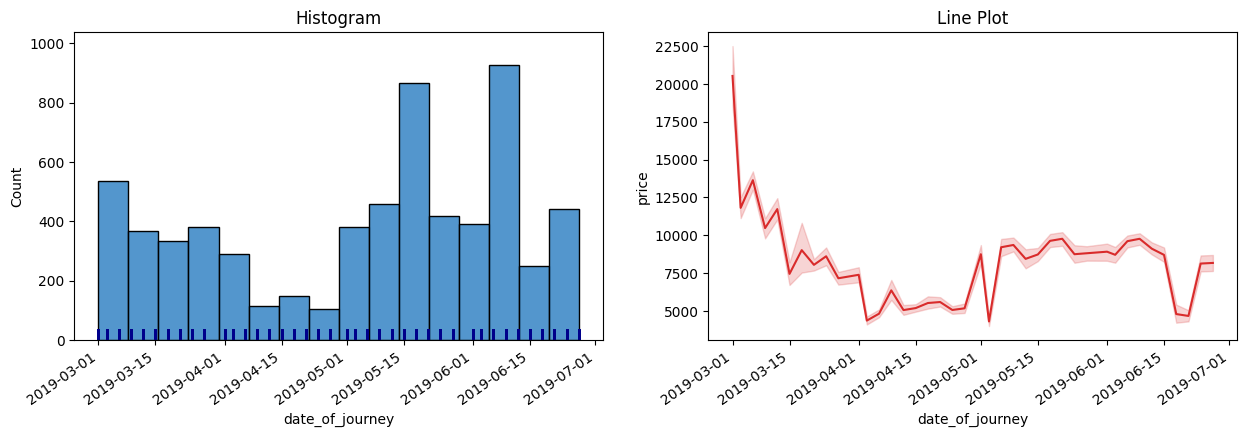

In [26]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

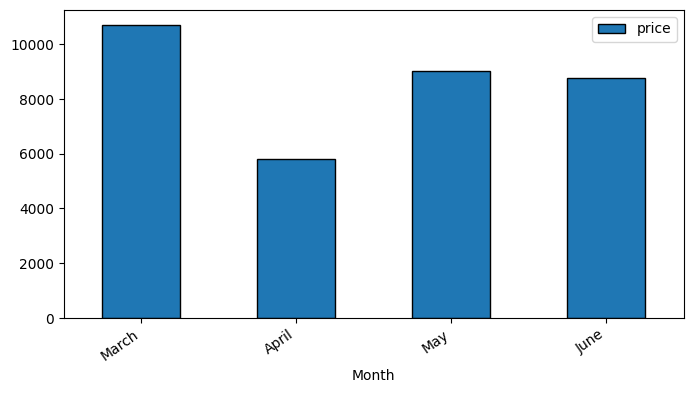

In [41]:
(
    train.groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis("Month")
    .plot(kind="bar",
          figsize=(8,4)
        ,
        edgecolor="black"
          )
    
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

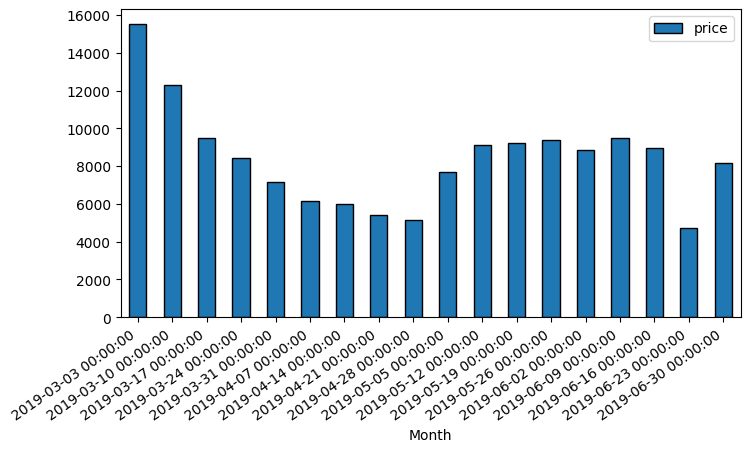

In [42]:
(
    train.groupby(pd.Grouper(key="date_of_journey",freq="w"))
    .price.mean()
    .to_frame()
    .rename_axis("Month")
    .plot(kind="bar",
          figsize=(8,4),
        edgecolor="black"
          )
    
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

<Axes: xlabel='Month'>

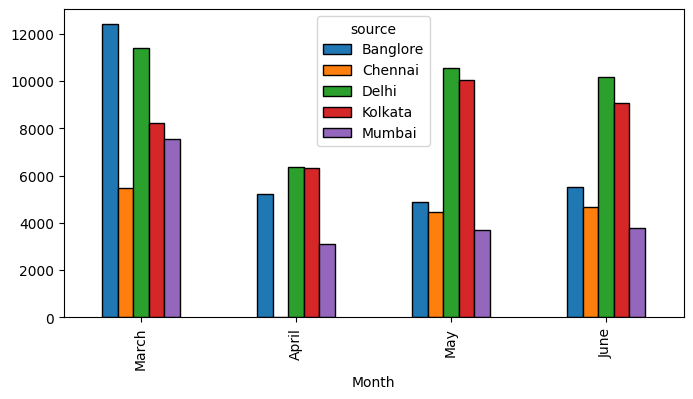

In [48]:
(
    train.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
     .set_axis(["March","April","May","June"],axis=0)
    .rename_axis("Month")
    .plot(kind="bar",
          figsize=(8,4)
        ,
        edgecolor="black"
          )
    
)

### 8.3 dep_time

In [50]:
train.dep_time

0      2024-06-28 08:30:00
1      2024-06-28 11:35:00
2      2024-06-28 13:25:00
3      2024-06-28 10:00:00
4      2024-06-28 16:10:00
               ...        
6395   2024-06-28 17:00:00
6396   2024-06-28 11:40:00
6397   2024-06-28 14:00:00
6398   2024-06-28 13:00:00
6399   2024-06-28 12:00:00
Name: dep_time, Length: 6400, dtype: datetime64[ns]

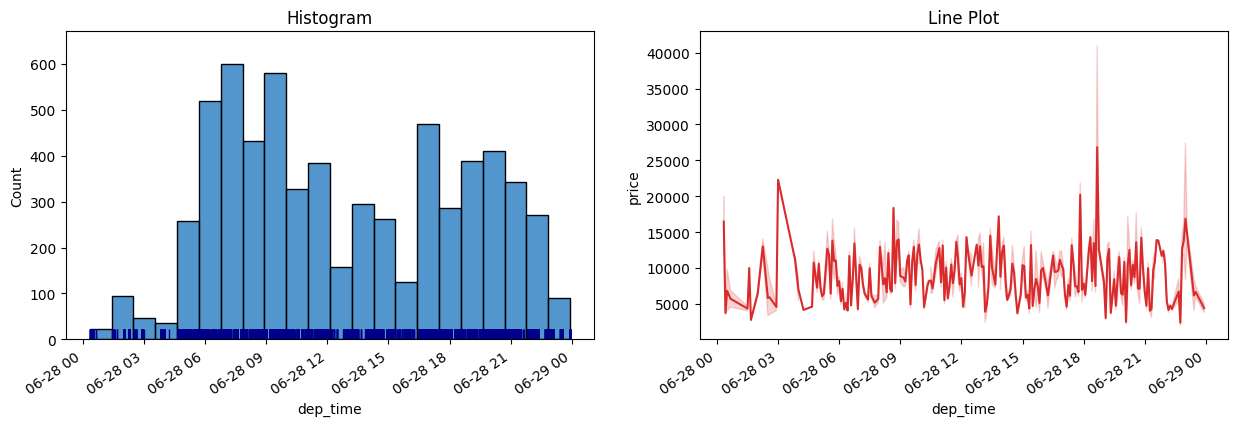

In [52]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

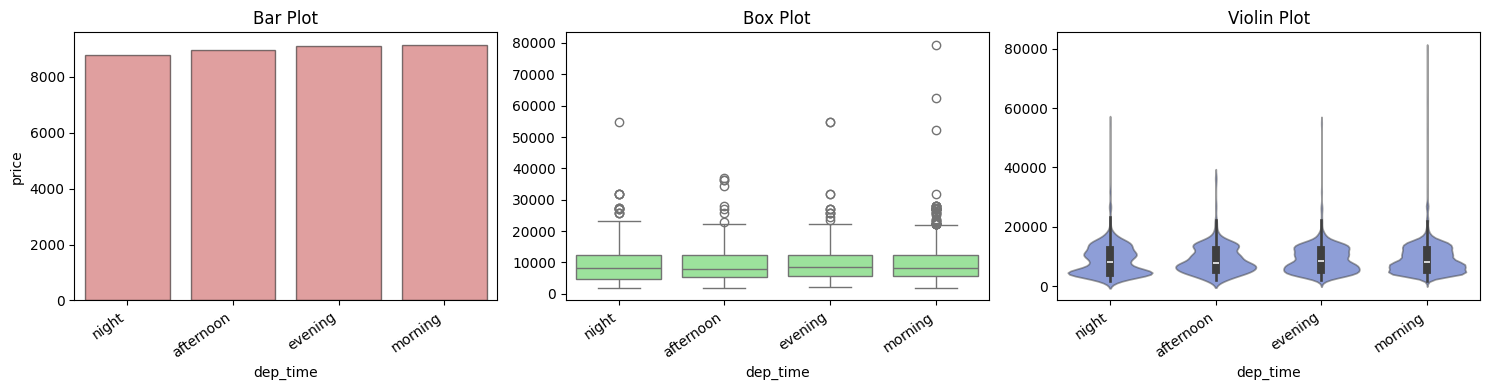

In [61]:
(
    train
    .assign(dep_time= lambda df_ :(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                                df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                                df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                               ["morning","afternoon","evening"],
                               default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
    #.dep_time
    #.dt.hour
   # .pipe(
    #    lambda ser : pd.Series()
   # )
)


### 8.4 Duration

In [62]:
 train.duration

0        630
1        435
2       1775
3       1665
4        380
        ... 
6395     385
6396     135
6397     420
6398     170
6399     590
Name: duration, Length: 6400, dtype: int64

In [63]:
eda_helper_functions.num_summary(train,"duration")

0        630
1        435
2       1775
3       1665
4        380
        ... 
6395     385
6396     135
6397     420
6398     170
6399     590
Name: duration, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,515.0
75,910.0
90,1450.0
95,1600.0
99,1840.0


,value
mean,634.128125
trimmed mean (5%),601.131944
trimmed mean (10%),572.481445
median,515.000000


,value
var,250288.472408
std,500.288389
IQR,740.000000
mad,345.000000
coef_variance,0.788939


,value
skewness,0.876960
kurtosis,-0.124973


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8881457448005676
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 233.27487904411828
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


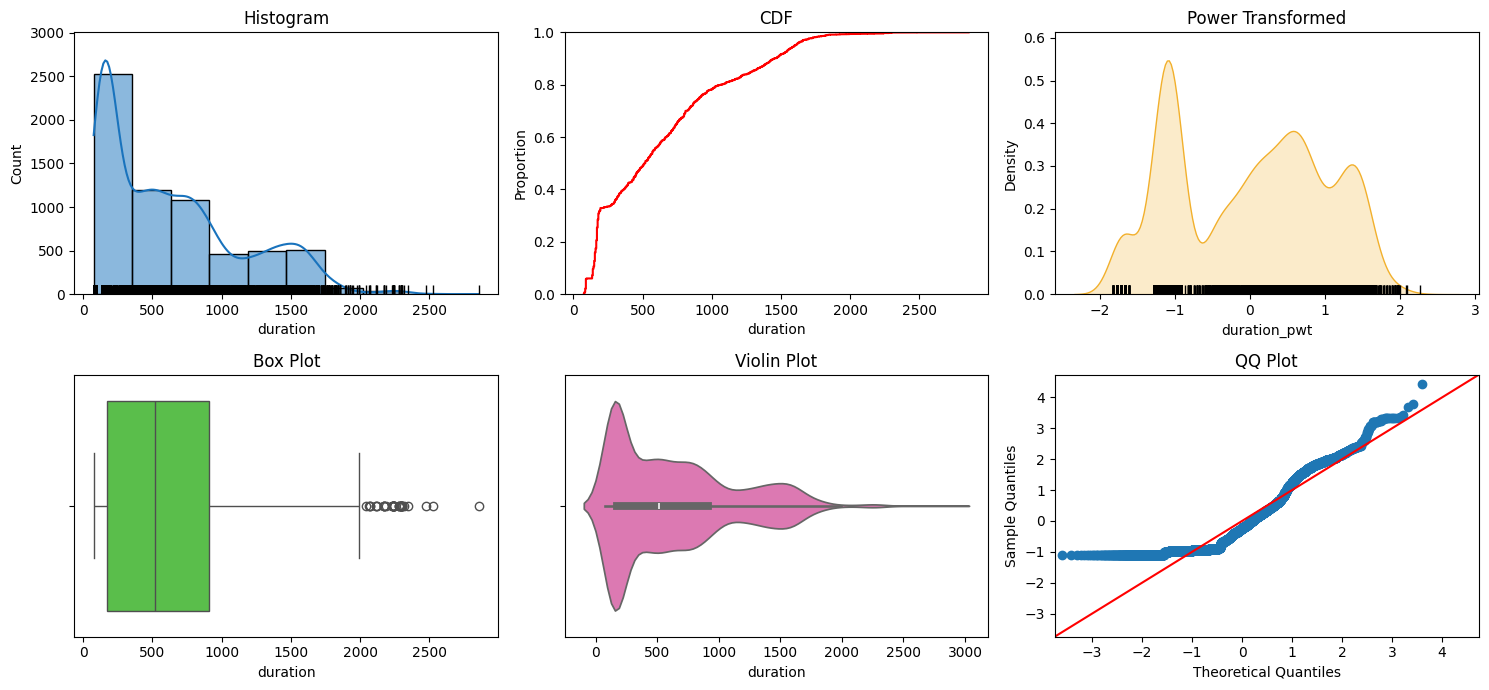

In [64]:
eda_helper_functions.num_univar_plots(train,"duration")

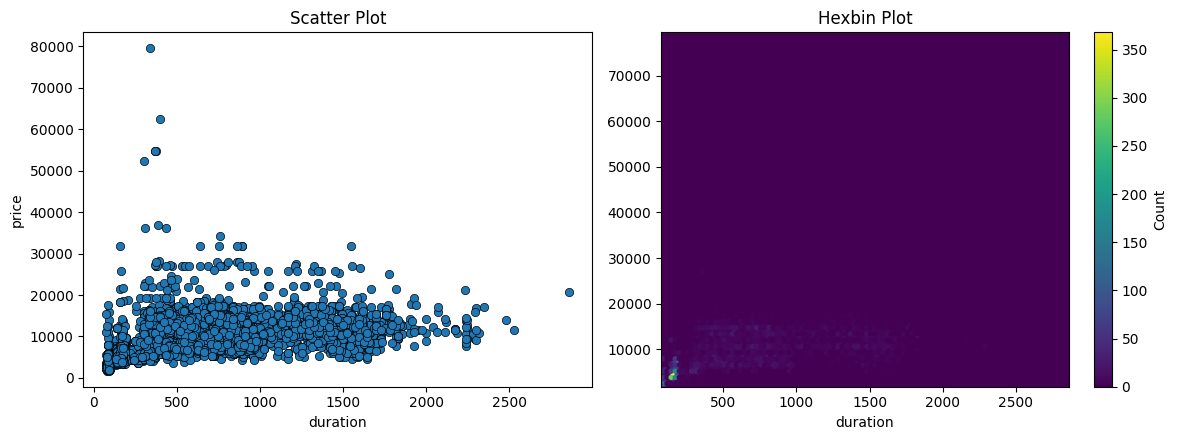

In [67]:
eda_helper_functions.num_bivar_plots(train,"duration","price")

In [69]:
eda_helper_functions.num_num_hyp_testing(train,"duration","price")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4923246945008172
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6919258127428417
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


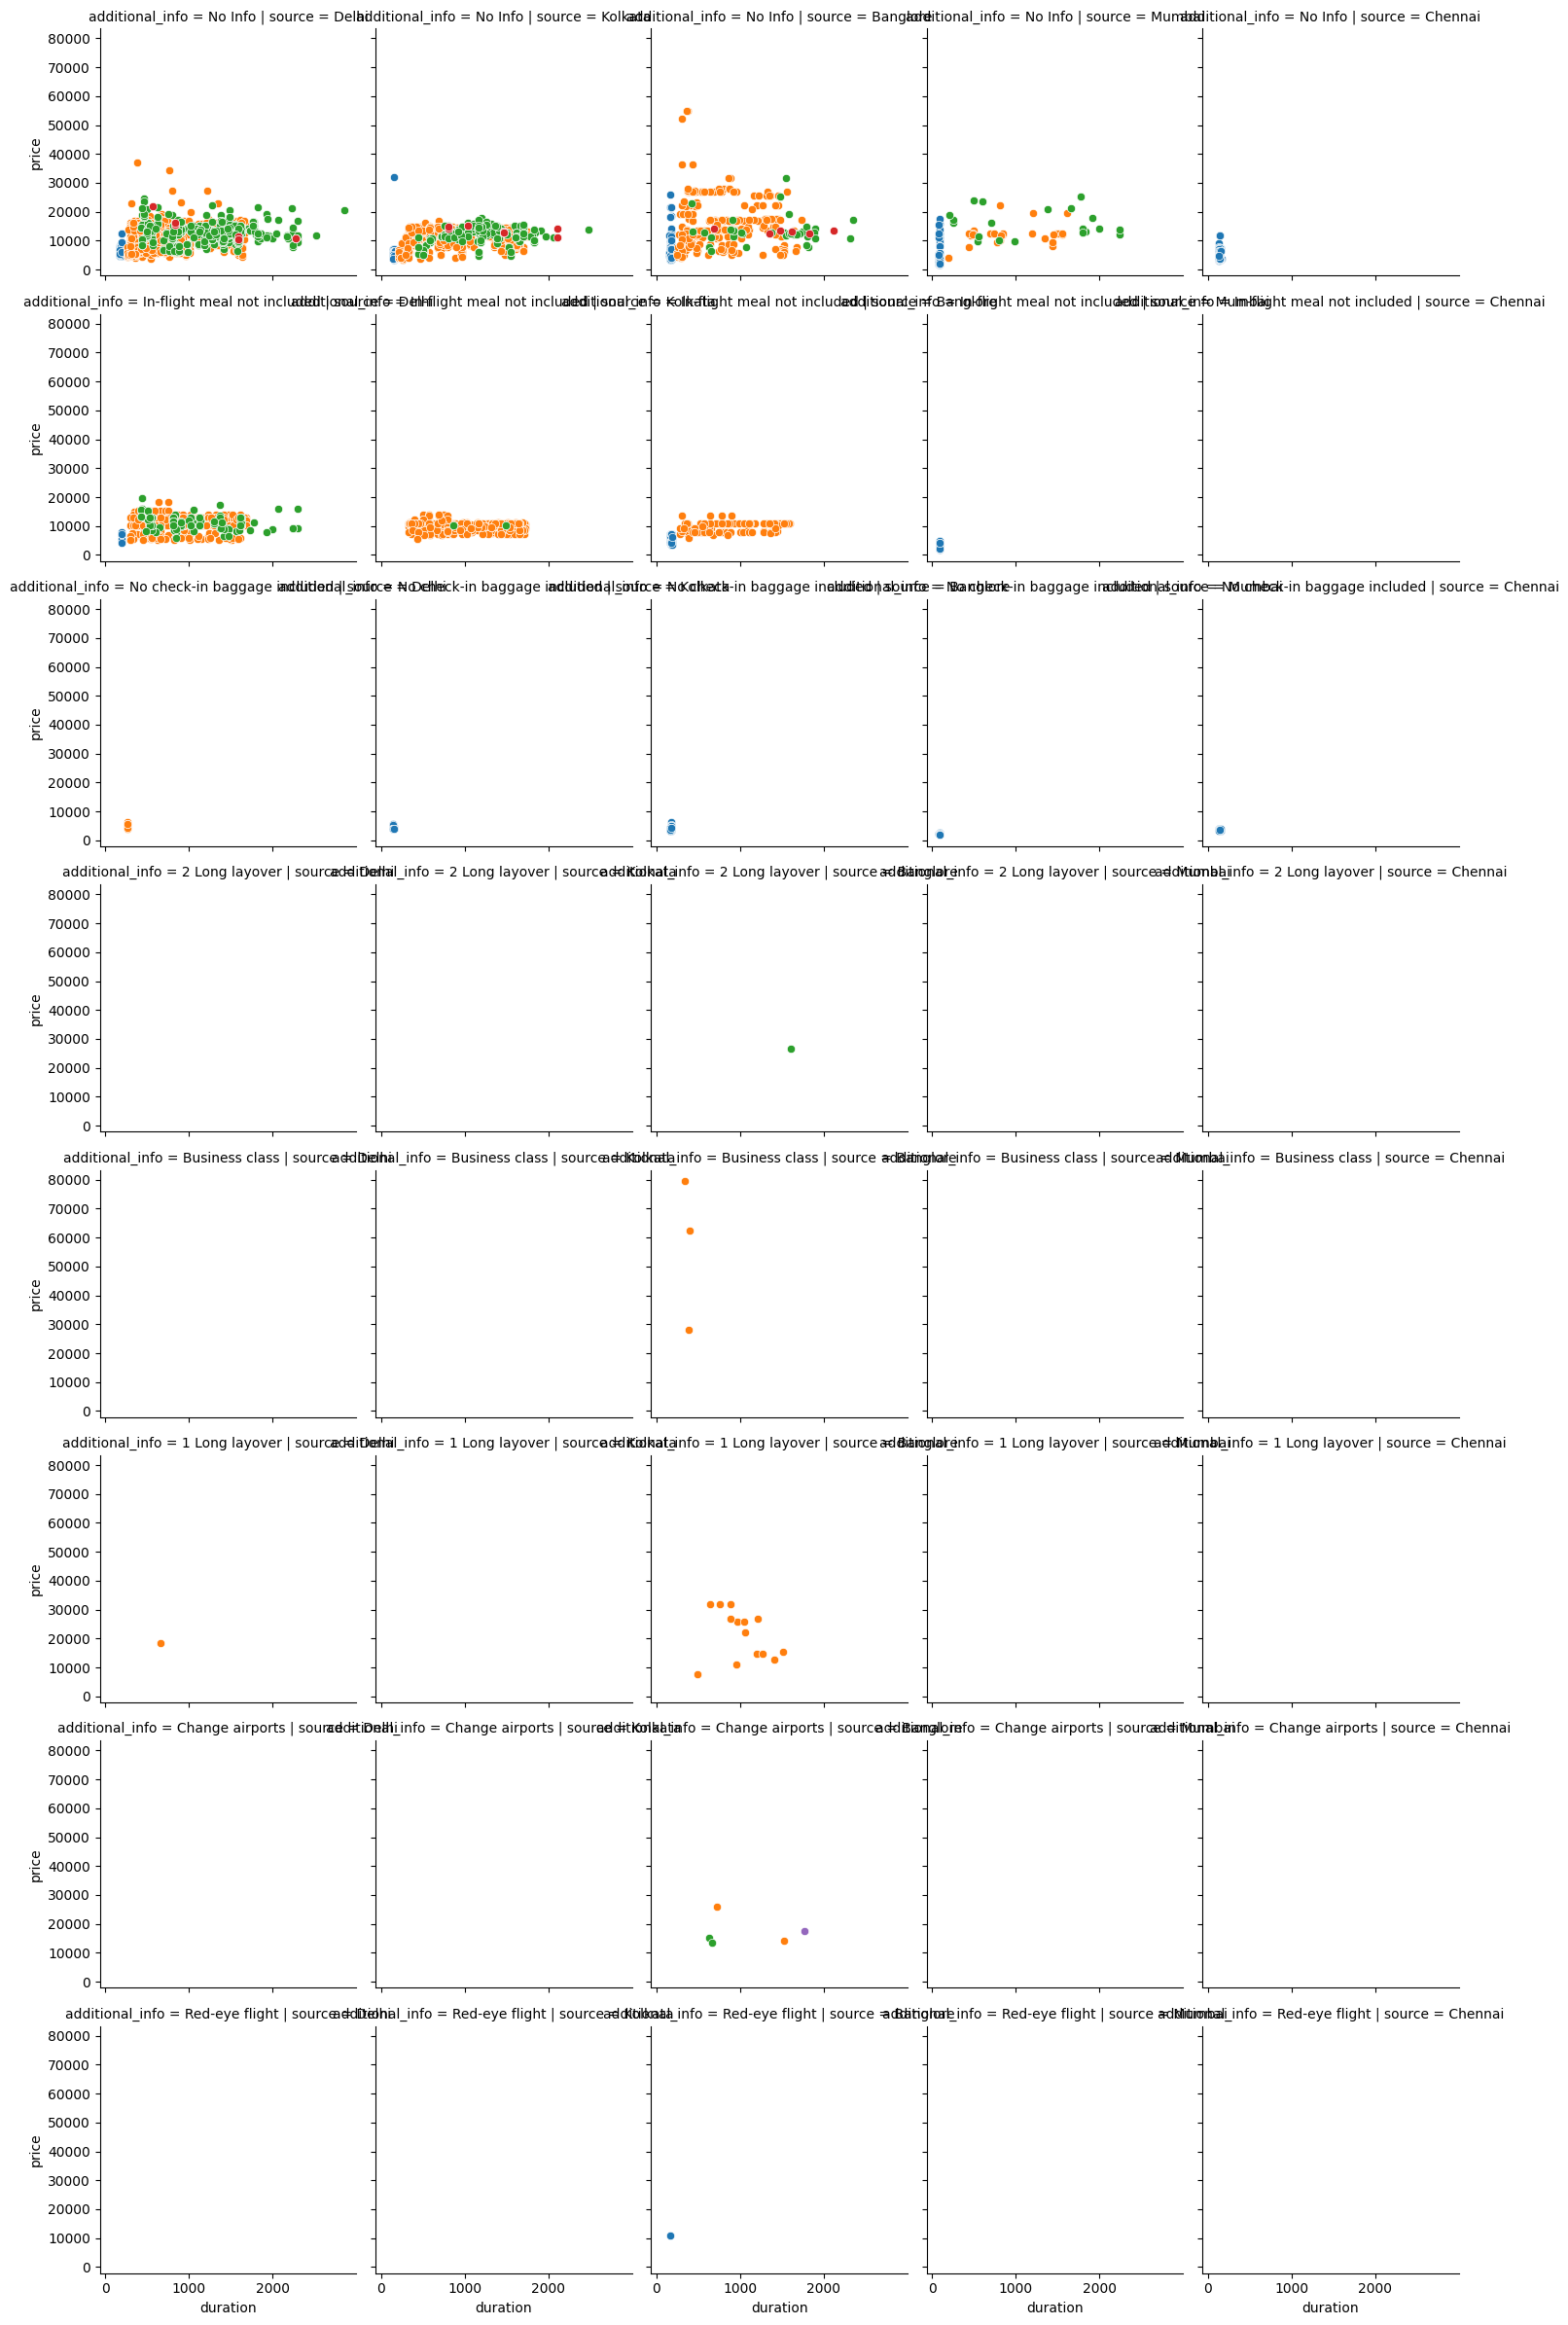

In [74]:
duration_grid= sns.FacetGrid(data=train,col="source",row="additional_info",hue="total_stops",sharex=True)
duration_grid.map(sns.scatterplot,"duration","price")

### 9. AutoMatated EDA